In [33]:
import numpy as np

In [3]:
import pandas as pd
prices = pd.DataFrame({'Blue':[8.7,8.91,8.71,8.43,8.73]
                       ,'Orange':[10.66,11.08,10.71,11.59,12.11]
                      }
)

In [4]:
prices

,Blue,Orange
0,8.70,10.66
1,8.91,11.08
2,8.71,10.71
3,8.43,11.59
4,8.73,12.11


In [5]:
B=prices.iloc[:-1]
A= prices.iloc[1:]

In [6]:
type(B)

pandas.core.frame.DataFrame

In [7]:
type(B.values)

numpy.ndarray

In [8]:
B.values


array([[ 8.7 , 10.66],
       [ 8.91, 11.08],
       [ 8.71, 10.71],
       [ 8.43, 11.59]])

In [9]:
prices.pct_change() #easiest way to calculate returns

,Blue,Orange
0,NaN,NaN
1,0.024138,0.039400
2,-0.022447,-0.033394
3,-0.032147,0.082166
4,0.035587,0.044866


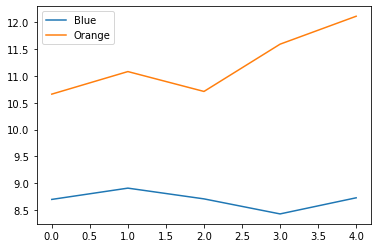

In [12]:
prices.plot()

In [34]:
## From here onwards we look at Risk-Adjusted Returns

In [35]:
prices = pd.read_csv('data/sample_prices.csv')

In [36]:
returns = prices.pct_change()

In [39]:
returns = returns.dropna()

In [40]:
returns.std() # this calculates sample standard deviation, which uses n-1 as denominator

BLUE      0.023977
ORANGE    0.079601
dtype: float64

In [41]:
deviations = returns - returns.mean()
squared_deviations = deviations**2
variance = squared_deviations.mean()
volatility = variance ** 0.5 # this calculates population standard deviation

In [42]:
num_obs = returns.shape[0]
variance = squared_deviations.sum()/(num_obs-1)

In [43]:
volatility = variance ** 0.5

In [44]:
volatility # now this also does the same, sample standard deviation

BLUE      0.023977
ORANGE    0.079601
dtype: float64

In [45]:
annul_vol = volatility * 12**(1/2)

In [46]:
annul_vol

BLUE      0.083060
ORANGE    0.275747
dtype: float64

In [48]:
returns = pd.read_csv('data/Portfolios_Formed_on_ME_monthly_EW.csv',header=0,index_col=0,parse_dates = True,na_values=-99.99) #header,index_col tells you where header and index columns are at

In [50]:
type(returns)

pandas.core.frame.DataFrame

In [51]:
returns.head()

,<= 0,Lo 30,Med 40,Hi 30,Lo 20,Qnt 2,Qnt 3,Qnt 4,Hi 20,Lo 10,Dec 2,Dec 3,Dec 4,Dec 5,Dec 6,Dec 7,Dec 8,Dec 9,Hi 10
192607,NaN,-0.43,1.52,2.68,-0.57,0.59,1.60,1.47,3.33,-1.45,0.29,-0.15,1.33,1.24,1.98,1.55,1.38,3.38,3.29
192608,NaN,3.90,3.04,2.09,3.84,3.59,3.71,1.61,2.33,5.12,2.59,4.03,3.15,2.72,4.72,1.60,1.63,0.98,3.70
192609,NaN,-1.08,-0.54,0.16,-0.48,-1.40,0.00,-0.50,-0.09,0.93,-1.87,-2.27,-0.53,0.07,-0.07,-1.64,0.64,-0.86,0.67
192610,NaN,-3.32,-3.52,-3.06,-3.29,-4.10,-2.89,-3.36,-2.95,-4.84,-1.77,-3.36,-4.83,-2.98,-2.80,-3.45,-3.27,-3.47,-2.43
192611,NaN,-0.46,3.82,3.09,-0.55,2.18,3.41,3.39,3.16,-0.78,-0.32,-0.29,4.65,3.24,3.57,3.82,2.95,3.61,2.70


In [52]:
columns=['Lo 10','Hi 10']
returns = returns[columns] #pick the columns we care about
returns.head()

,Lo 10,Hi 10
192607,-1.45,3.29
192608,5.12,3.70
192609,0.93,0.67
192610,-4.84,-2.43
192611,-0.78,2.70


In [53]:
returns = returns/100

In [54]:
returns.columns=['SmallCap','LargeCap'] #remove all of the old column headings and replace with what you input for text
returns.head()

,SmallCap,LargeCap
192607,-0.0145,0.0329
192608,0.0512,0.0370
192609,0.0093,0.0067
192610,-0.0484,-0.0243
192611,-0.0078,0.0270


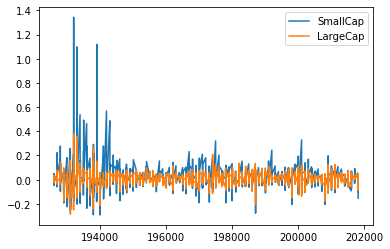

In [55]:
returns.plot.line()

In [56]:
returns.std()

SmallCap    0.106288
LargeCap    0.053900
dtype: float64

In [58]:
annual_vol = returns.std()*12**0.5
annual_vol

SmallCap    0.368193
LargeCap    0.186716
dtype: float64

In [61]:
n_months = returns.shape[0]
return_per_month = (returns+1).prod() ** (1/n_months)
return_per_month = return_per_month - 1

In [62]:
return_per_month

SmallCap    0.012986
LargeCap    0.007423
dtype: float64

In [63]:
annual_return = (return_per_month + 1) **12 - 1

In [64]:
#or more simply
annual_return = (returns+1).prod() ** (12/n_months) -1

In [65]:
annual_return

SmallCap    0.167463
LargeCap    0.092810
dtype: float64

In [67]:
#sharpe ratio = excess return/volatility
risk_free_rate = 0.03
excess_return = annual_return - risk_free_rate
sharpe_ratio = excess_return/annual_vol

In [68]:
sharpe_ratio # seems like small cap has a better shapre ratio over these years

SmallCap    0.373346
LargeCap    0.336392
dtype: float64